<a href="https://colab.research.google.com/github/islam-mirajul/Name-Based-Community-Prediction/blob/main/Community-Prediction(Last_Name).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import unicodedata

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Religion-prediction_last-name_.csv',error_bad_lines=False)
df

,LastName,Religion
0,হোসেন,ইসলাম
1,কামাল,ইসলাম
2,খানম,ইসলাম
3,কেশারী,হিন্দু
4,বড়ুয়া,বৌদ্ধ
...,...,...
8225,কাবের,ইসলাম
8226,বেপারি,ইসলাম
8227,জিতু,খ্রিষ্টান
8228,রিচিল,খ্রিষ্টান


In [ ]:
df.isnull().sum()

LastName    0
Religion    0
dtype: int64

In [ ]:
df['Religion'].value_counts()

ইসলাম        2118
খ্রিষ্টান    2106
হিন্দু       2014
বৌদ্ধ        1992
Name: Religion, dtype: int64

In [ ]:
df['Religion'].unique()

array(['ইসলাম', 'হিন্দু', 'বৌদ্ধ', 'খ্রিষ্টান'], dtype=object)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2454 missing from current font.
  font.set_text(s

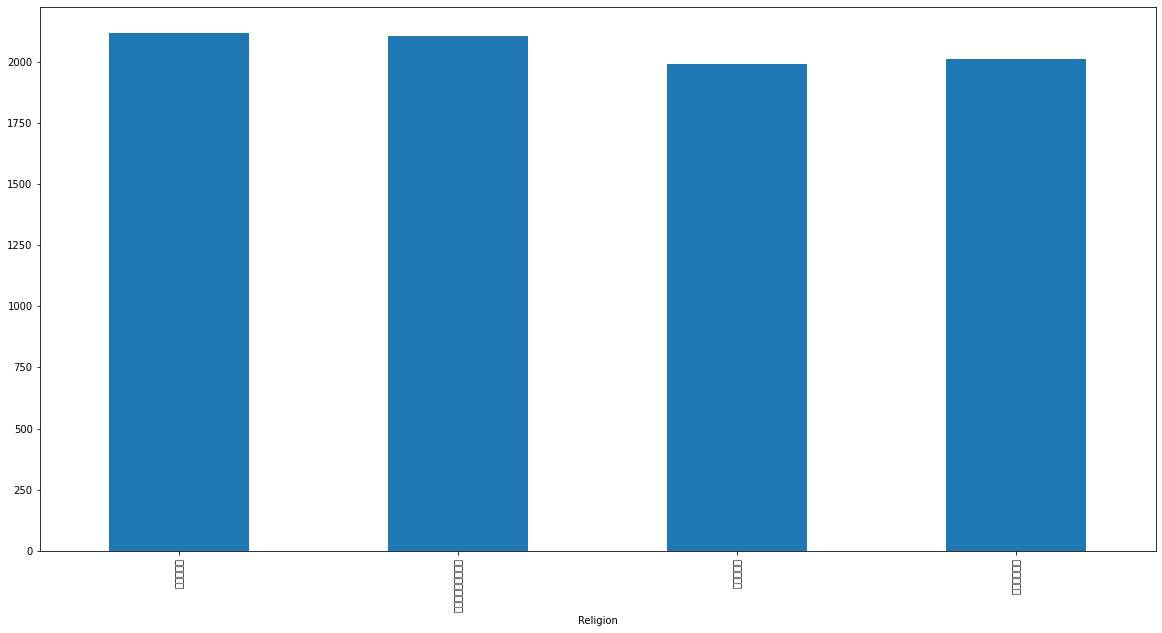

In [ ]:
df.groupby("Religion")['LastName'].size().plot(kind='bar',figsize=(20,10))

In [ ]:
from sklearn.model_selection import train_test_split

X = df['LastName']  # this time we want to look at the text
y = df['Religion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(6584, 421)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(6584, 421)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(6584, 421)

In [ ]:
 y_test.shape, X_test.shape,X_train.shape,y_train.shape

((1646,), (1646,), (6584,), (6584,))

In [ ]:

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

[[222 210   0   9]
 [ 12 393   6  14]
 [  7  77 294   6]
 [ 15 255   7 119]]


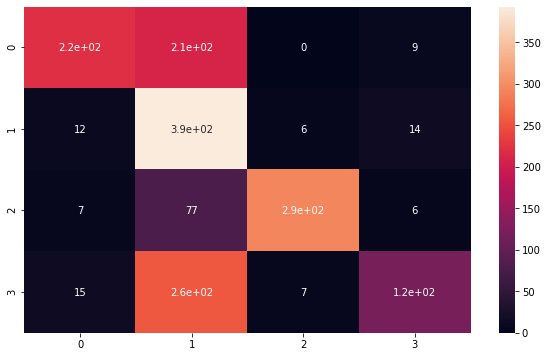

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.87      0.50      0.64       441
   খ্রিষ্টান       0.42      0.92      0.58       425
       বৌদ্ধ       0.96      0.77      0.85       384
      হিন্দু       0.80      0.30      0.44       396

    accuracy                           0.62      1646
   macro avg       0.76      0.62      0.63      1646
weighted avg       0.76      0.62      0.62      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6245443499392467


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train_tfidf,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:

from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,

[[215  23   2 201]
 [ 37  87   5 296]
 [ 12   5 287  80]
 [ 33  16  10 337]]


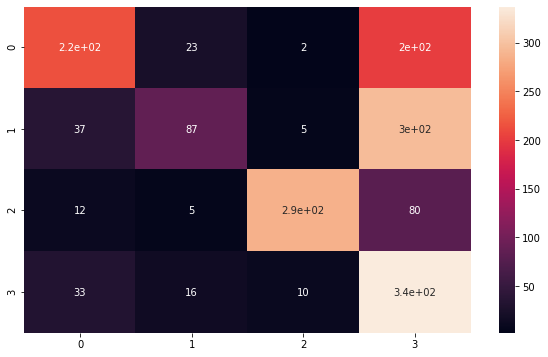

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.72      0.49      0.58       441
   খ্রিষ্টান       0.66      0.20      0.31       425
       বৌদ্ধ       0.94      0.75      0.83       384
      হিন্দু       0.37      0.85      0.51       396

    accuracy                           0.56      1646
   macro avg       0.68      0.57      0.56      1646
weighted avg       0.67      0.56      0.56      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.5625759416767923


In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_tfidf,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

[[223 208   0  10]
 [ 17 387   6  15]
 [  7  76 295   6]
 [ 16 250   6 124]]


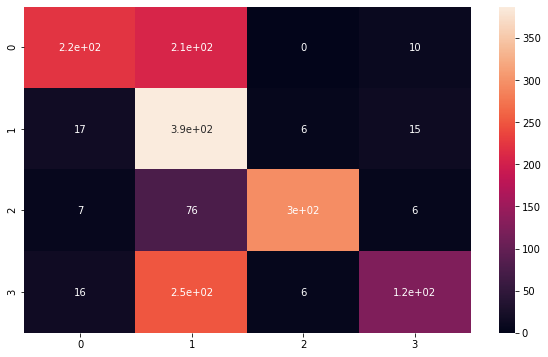

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.85      0.51      0.63       441
   খ্রিষ্টান       0.42      0.91      0.58       425
       বৌদ্ধ       0.96      0.77      0.85       384
      হিন্দু       0.80      0.31      0.45       396

    accuracy                           0.63      1646
   macro avg       0.76      0.62      0.63      1646
weighted avg       0.75      0.63      0.63      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6251518833535844


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

[[221 209   1  10]
 [ 12 393   4  16]
 [  8  84 286   6]
 [ 15 255   6 120]]


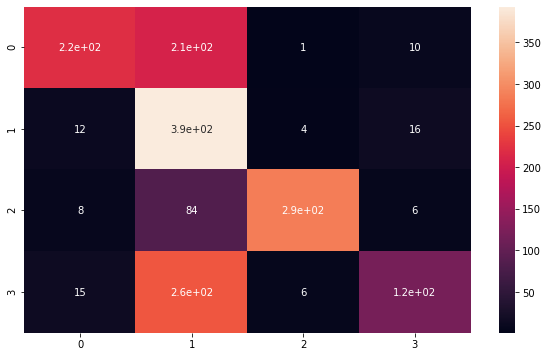

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.86      0.50      0.63       441
   খ্রিষ্টান       0.42      0.92      0.58       425
       বৌদ্ধ       0.96      0.74      0.84       384
      হিন্দু       0.79      0.30      0.44       396

    accuracy                           0.62      1646
   macro avg       0.76      0.62      0.62      1646
weighted avg       0.75      0.62      0.62      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6196840826245443


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',RandomForestClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)

[[224 209   0   8]
 [ 16 389   8  12]
 [  7  76 295   6]
 [ 16 252   7 121]]


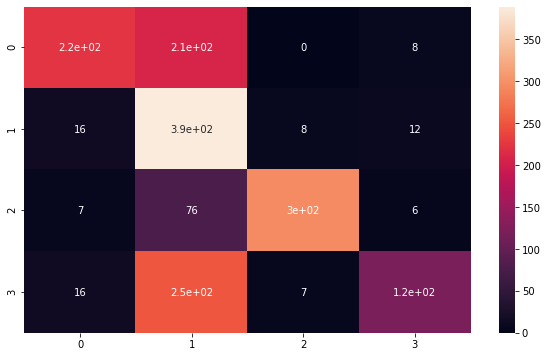

In [ ]:
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.85      0.51      0.64       441
   খ্রিষ্টান       0.42      0.92      0.58       425
       বৌদ্ধ       0.95      0.77      0.85       384
      হিন্দু       0.82      0.31      0.45       396

    accuracy                           0.63      1646
   macro avg       0.76      0.62      0.63      1646
weighted avg       0.76      0.63      0.62      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6251518833535844


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',DecisionTreeClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
               

[[226 208   0   7]
 [ 20 387   6  12]
 [  8  75 295   6]
 [ 20 252   7 117]]


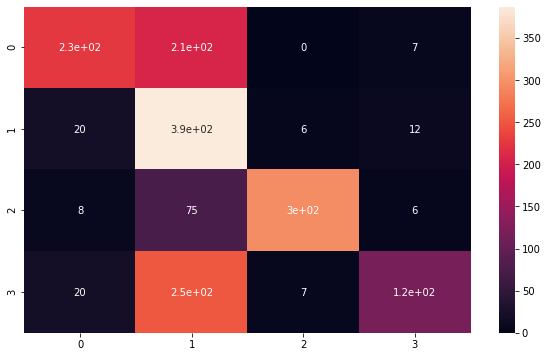

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.82      0.51      0.63       441
   খ্রিষ্টান       0.42      0.91      0.57       425
       বৌদ্ধ       0.96      0.77      0.85       384
      হিন্দু       0.82      0.30      0.43       396

    accuracy                           0.62      1646
   macro avg       0.76      0.62      0.62      1646
weighted avg       0.75      0.62      0.62      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6227217496962333


In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train_tfidf,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',SGDClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

[[222 209   1   9]
 [ 16 387   7  15]
 [  8  75 295   6]
 [ 16 255   9 116]]


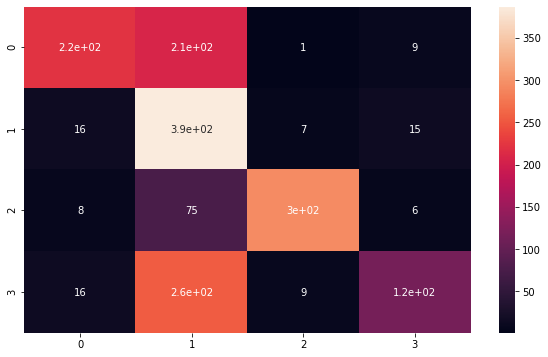

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.85      0.50      0.63       441
   খ্রিষ্টান       0.42      0.91      0.57       425
       বৌদ্ধ       0.95      0.77      0.85       384
      হিন্দু       0.79      0.29      0.43       396

    accuracy                           0.62      1646
   macro avg       0.75      0.62      0.62      1646
weighted avg       0.75      0.62      0.62      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6196840826245443


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',MultinomialNB()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

[[217 213   1  10]
 [ 11 393   6  15]
 [  6  77 293   8]
 [ 11 258   4 123]]


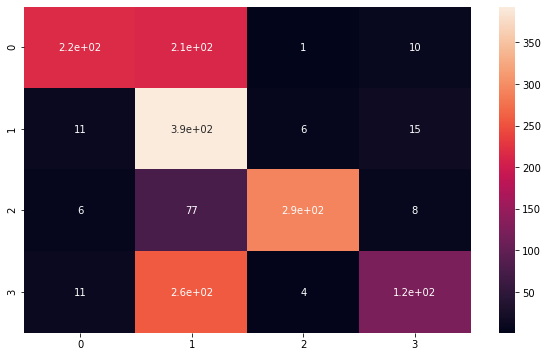

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.89      0.49      0.63       441
   খ্রিষ্টান       0.42      0.92      0.58       425
       বৌদ্ধ       0.96      0.76      0.85       384
      হিন্দু       0.79      0.31      0.45       396

    accuracy                           0.62      1646
   macro avg       0.76      0.62      0.63      1646
weighted avg       0.76      0.62      0.62      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6233292831105711
